# Visualization

We'll begin by loading the data we needed for reach quantity including: `co2` (metric tonnes of carbon dioxide per capita), `income` (gross domestic product per capita, in 2011 dollars), `pop` (population) and `continents` (labels of which content each country belongs to so we can group by region). We have these data merged into a single DataFrame `data` so that we can plot it. Let's take a look at our dataset before we begin plotting it (it's always key to do so):

In [2]:
%config InlineBackend.figure_format = 'retina'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('data/intermediate/data.csv')
data

,country,co2,income,population,continent
0,Afghanistan,0.254,2030.0,37200000.0,Asia
1,Angola,1.120,6930.0,30800000.0,Africa
2,Albania,1.590,13300.0,2880000.0,Europe
3,Andorra,6.120,58300.0,77000.0,Europe
4,United Arab Emirates,21.400,67000.0,9630000.0,Asia
...,...,...,...,...,...
188,Samoa,1.320,6390.0,196000.0,Asia
189,Yemen,0.356,2660.0,28500000.0,Asia
190,South Africa,8.100,13900.0,57800000.0,Africa
191,Zambia,0.302,3520.0,17400000.0,Africa


Let's start with the simplest possible plot we could make here and we will take it, one step at a time, to make a progressively more complex plot.

For our first step, let's create a simple scatter plot from the data using `matplotlib`:

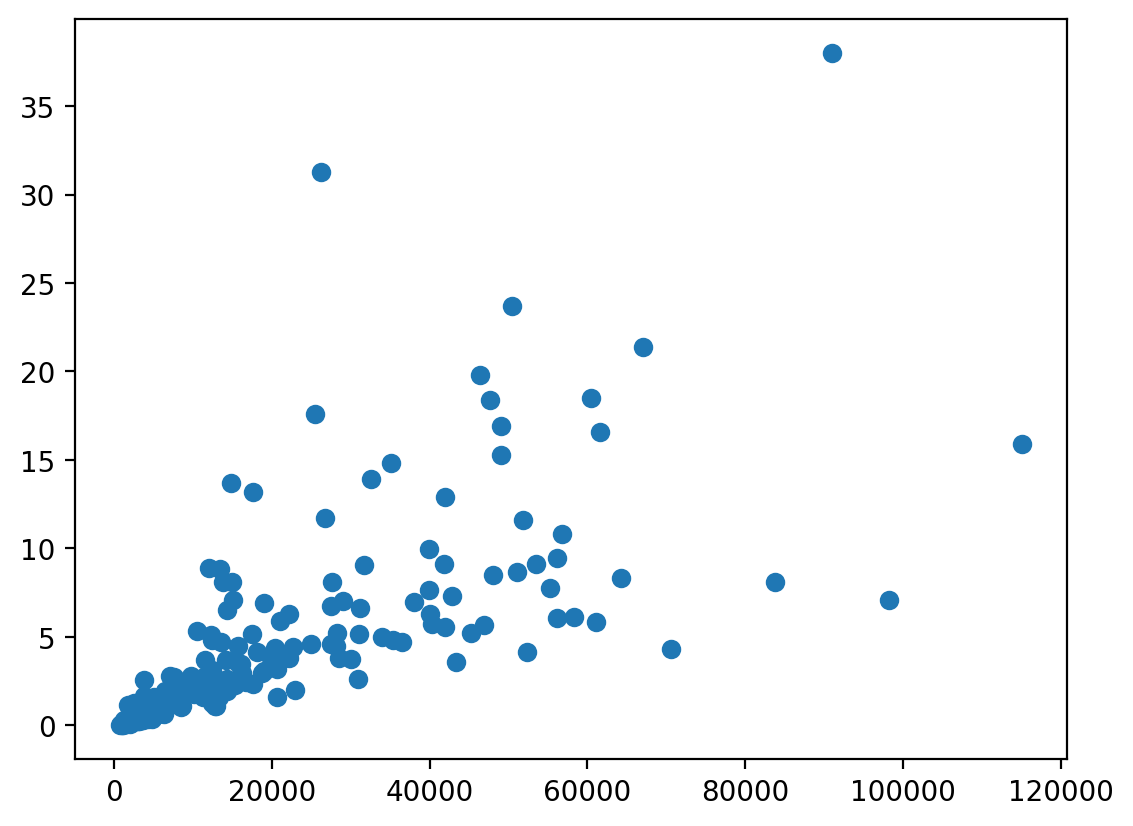

In [3]:
fig, ax = plt.subplots()
ax.scatter(x=data.income, y=data.co2)

Let's make sure we label our axes so that we know what we're plotting (this is always good visualization hygene):

[Text(0.5, 0, 'Income Per Capita (GDP per person in USD)'),
 Text(0, 0.5, 'Carbon Dioxide Emissions per person (metric tonnes)')]

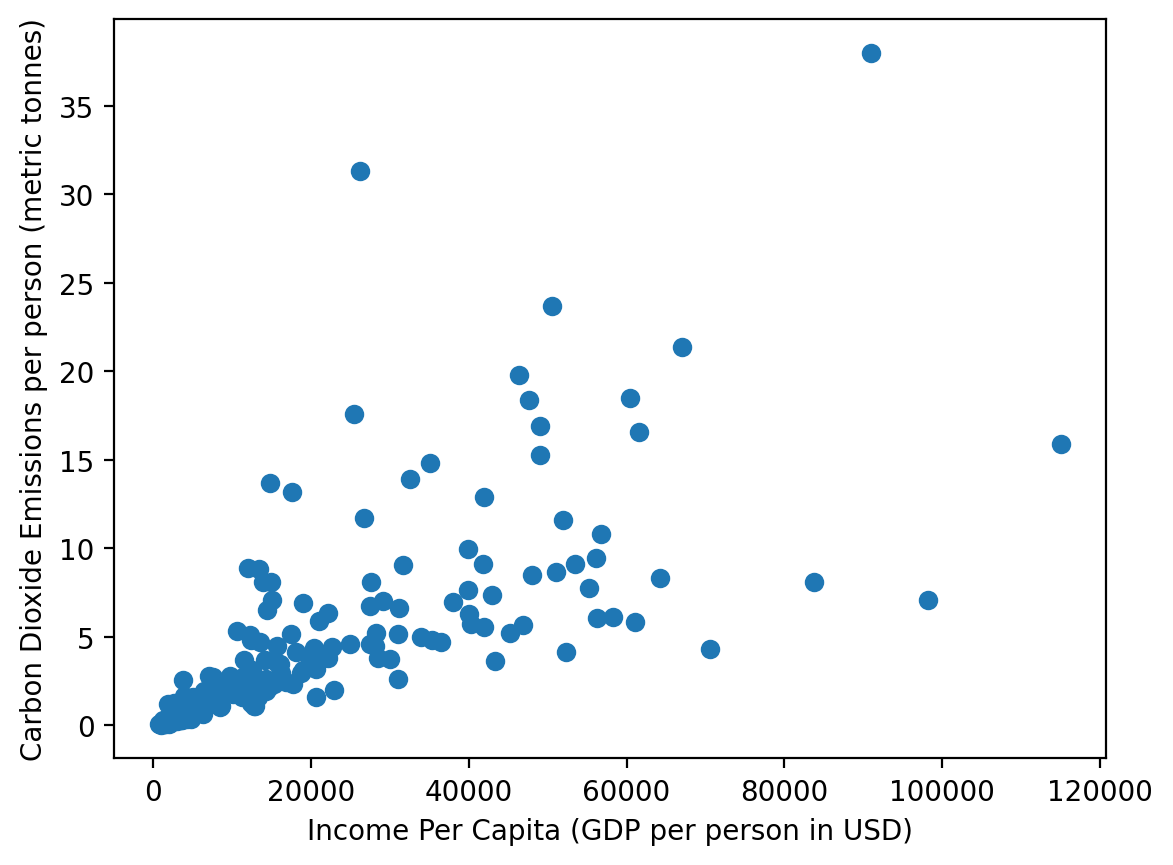

In [4]:
fig, ax = plt.subplots()
ax.scatter(x=data.income, y=data.co2)
ax.set(
    xlabel="Income Per Capita (GDP per person in USD)",
    ylabel="Carbon Dioxide Emissions per person (metric tonnes)",
)

Next, a lot of the markers are overlapping one another in the lower left of the plot, so it's hard to see how many countries are represented there. Let's add transparency there using the `alpha` plotting keyword to make those points semi-transparent so we can read this more clearly

[Text(0.5, 0, 'Income Per Capita (GDP per person in USD)'),
 Text(0, 0.5, 'Carbon Dioxide Emissions per person (metric tonnes)')]

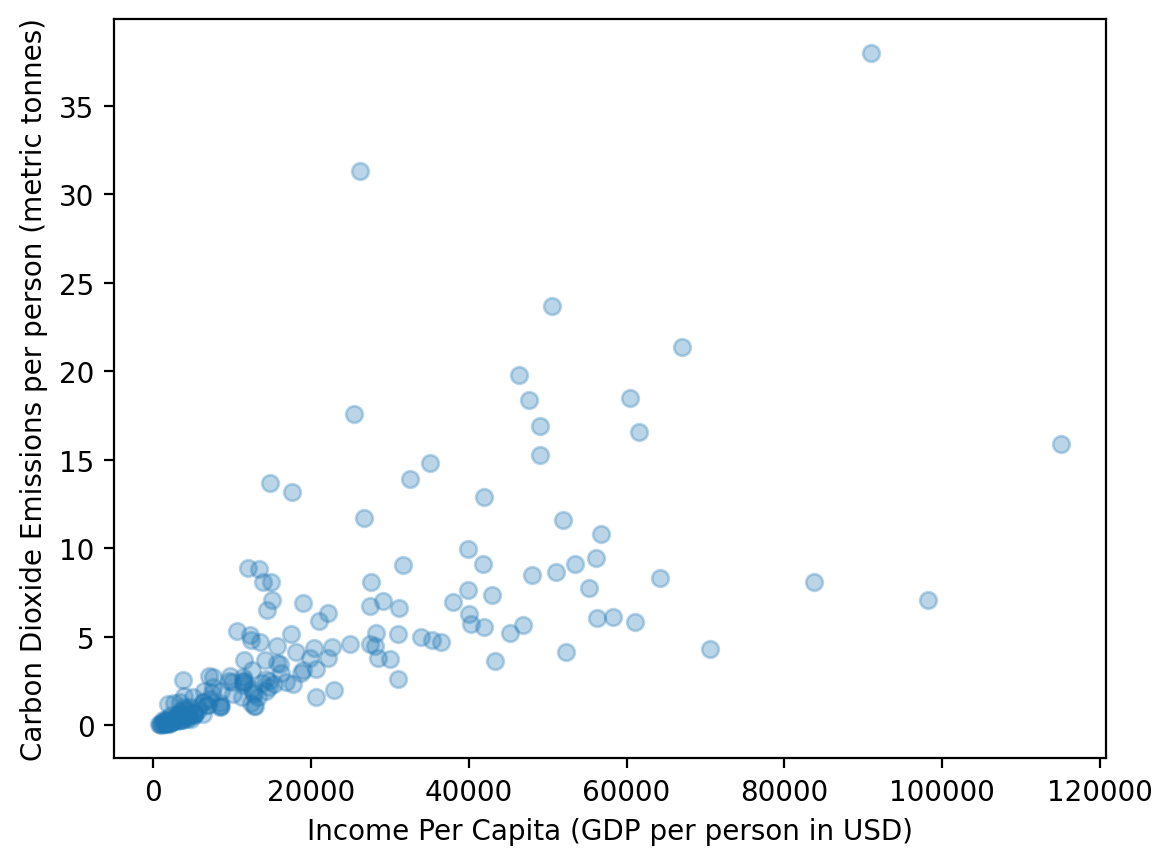

In [5]:
fig, ax = plt.subplots()
ax.scatter(x=data.income, y=data.co2, alpha=0.3)
ax.set(
    xlabel="Income Per Capita (GDP per person in USD)",
    ylabel="Carbon Dioxide Emissions per person (metric tonnes)",
)

What's clear here is that many of the values are clumped together in the lower left. This makes this plot more difficult to read since one or two outliers in the data dominate the scale of the axes. Instead, lets set the scale to a logarithmic scale. With a log scale, instead of incrementing each tick as one unit at a time (1, 2, 3, 4, 5, ...) each tick of the plot jumps (typically) by a power of 10 (1, 10, 100, 1000, 10000, ...). This will help us see both the very small and the very large values more clearly. 

[Text(0.5, 0, 'Income Per Capita (GDP per person in USD)'),
 Text(0, 0.5, 'Carbon Dioxide Emissions per person (metric tonnes)'),
 None,
 None]

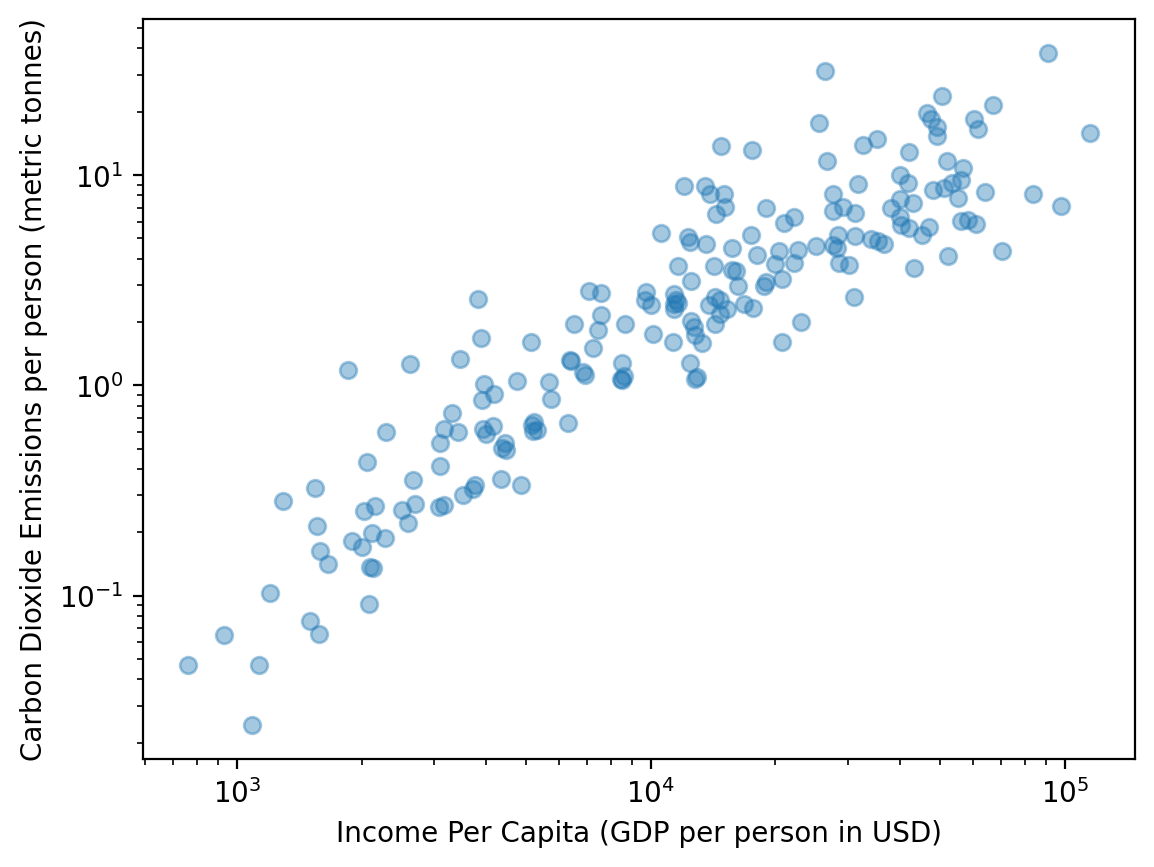

In [6]:
fig, ax = plt.subplots()
ax.scatter(x=data.income, y=data.co2, alpha=0.4)
ax.set(
    xlabel="Income Per Capita (GDP per person in USD)",
    ylabel="Carbon Dioxide Emissions per person (metric tonnes)",
    xscale="log",
    yscale="log",
)

That is much easier to see the individual points in the plot, now. However, we haven't encoded the population of each country into the plot, yet. To do so, let's set the size based on the population. We can do this with the `s` keyword in the `scatter` method. However, we can't use raw population since that would create circles with a size in the billions - far too big to fit on the screen! However, if we scale that down by a factor of 500,000, that generally brings the values of the largest countries like China to less than 20. In practice, you often have to tweak the scales of these values to make it work for your data; in this case, dividing by 500,000 will do the trick.

[Text(0.5, 0, 'Income Per Capita (GDP per person in USD)'),
 Text(0, 0.5, 'Carbon Dioxide Emissions per person (metric tonnes)'),
 None,
 None]

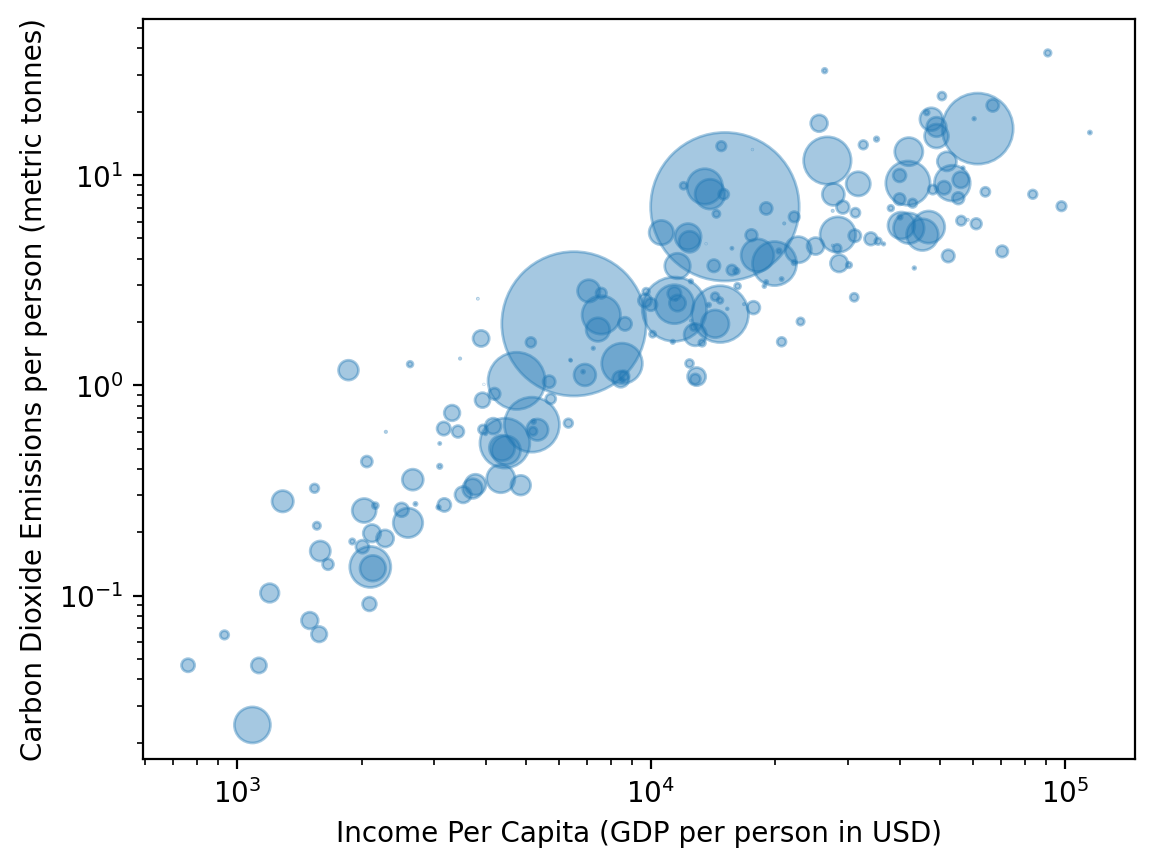

In [7]:
fig, ax = plt.subplots()
ax.scatter(x=data.income, y=data.co2, s=data.population / 500000, alpha=0.4)
ax.set(
    xlabel="Income Per Capita (GDP per person in USD)",
    ylabel="Carbon Dioxide Emissions per person (metric tonnes)",
    xscale="log",
    yscale="log",
)

We still have one more significant difference from this plot to the GapMinder plot; that is coloring the markers by the region of the world where each country/territory is located. Assigning those colors is a little tricky since we need to create an array of colors that matches the order of our data so we can assign it along with the other inputs to `scatter`.

In [8]:
region = ["Africa", "Asia", "Europe", "Americas"]
color = ["#00d5e9", "#ff5872", "#ffe700", "#84ec04"]

# Create a color list for each country that corresponds to the assigned color of the continent
color_list = []
for ir, r in enumerate(data.continent.values):
    for ireg, reg in enumerate(region):
        if r == reg:
            color_list.append(color[ireg])

Let's use that list to color our markers:

[Text(0.5, 0, 'Income Per Capita (GDP per person in USD)'),
 Text(0, 0.5, 'Carbon Dioxide Emissions per person (metric tonnes)'),
 None,
 None]

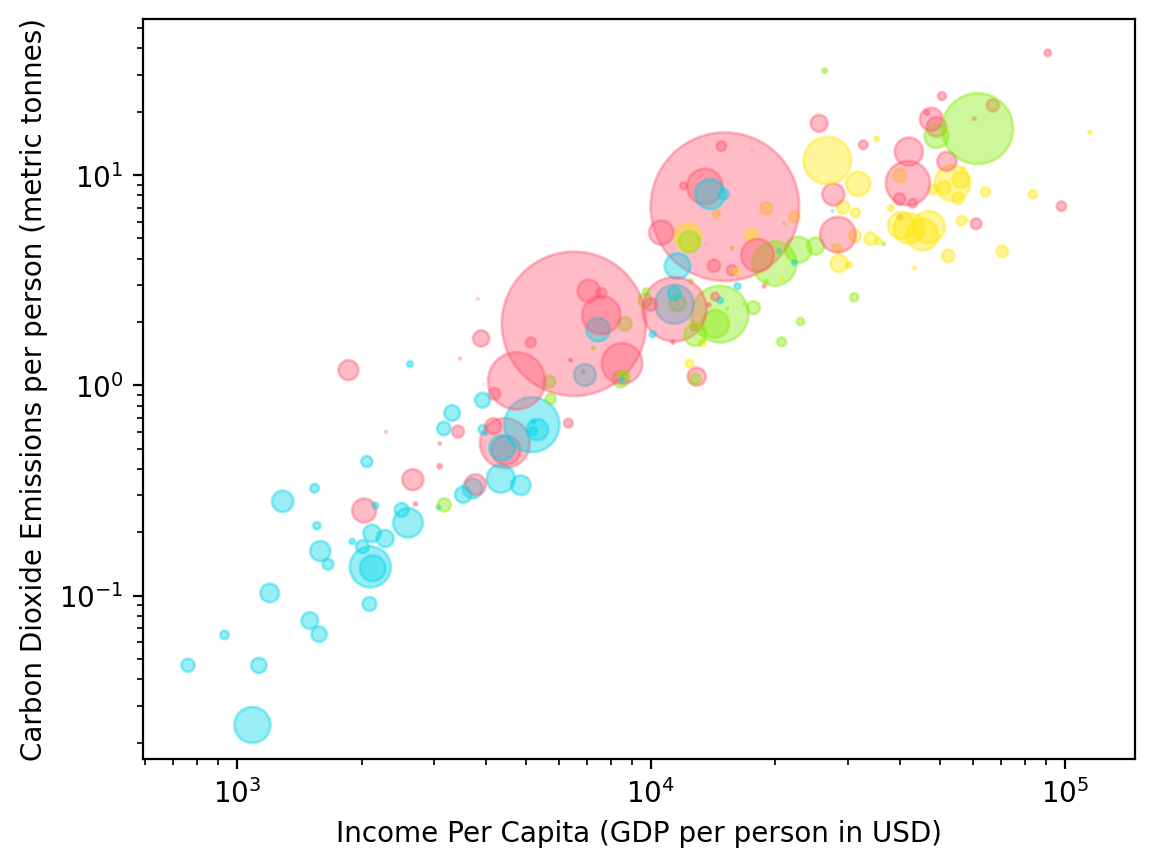

In [9]:
fig, ax = plt.subplots()
ax.scatter(x=data.income, y=data.co2, s=data.population / 500000, alpha=0.4, color=color_list)
ax.set(
    xlabel="Income Per Capita (GDP per person in USD)",
    ylabel="Carbon Dioxide Emissions per person (metric tonnes)",
    xscale="log",
    yscale="log",
)

Now lets add a black boundary to the marker. We can do this with the `edgecolors` property. We could feed in a color for each of the markers separately, but instead, we'll provide one color for all markers and make the edges black.

[Text(0.5, 0, 'Income Per Capita (GDP per person in USD)'),
 Text(0, 0.5, 'Carbon Dioxide Emissions per person (metric tonnes)'),
 None,
 None]

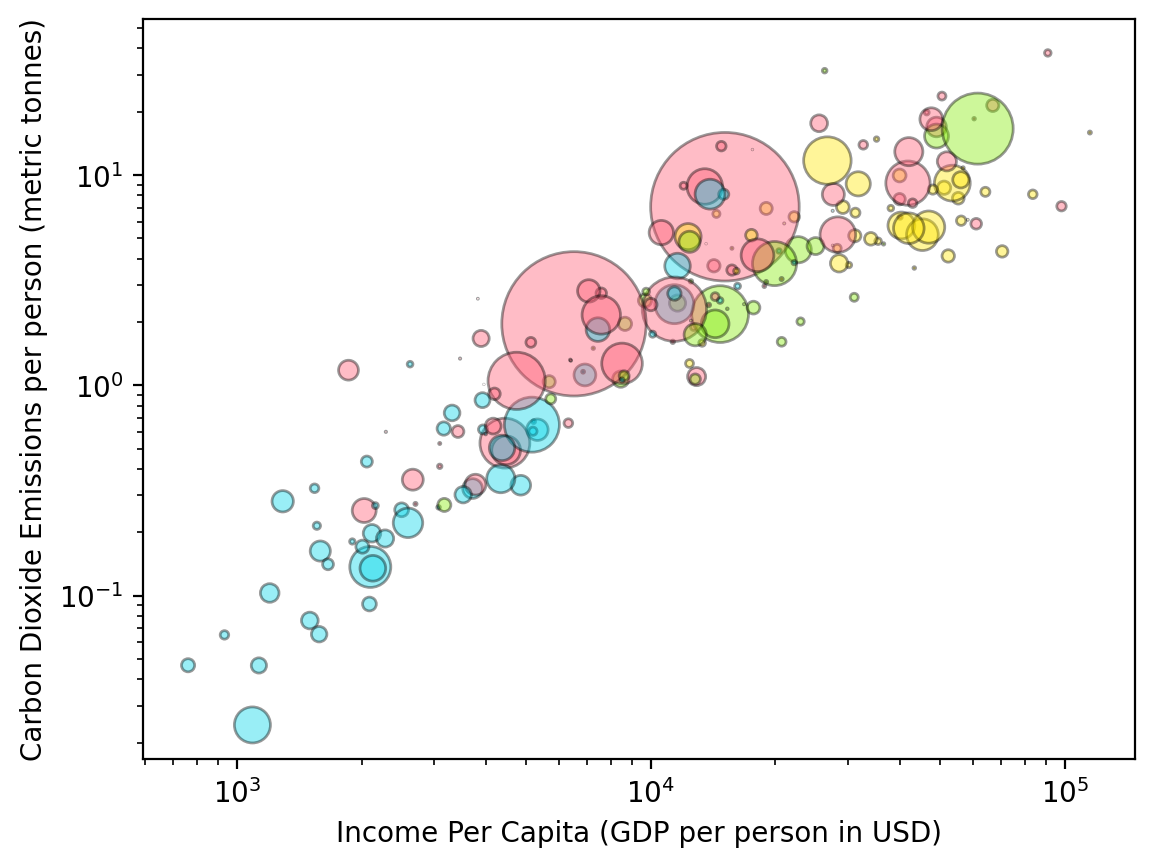

In [10]:
fig, ax = plt.subplots()
ax.scatter(
    x=data.income,
    y=data.co2,
    s=data.population / 500000,
    alpha=0.4,
    color=color_list,
    edgecolors="black",
)
ax.set(
    xlabel="Income Per Capita (GDP per person in USD)",
    ylabel="Carbon Dioxide Emissions per person (metric tonnes)",
    xscale="log",
    yscale="log",
)

This plot is a bit too small at this point to really read well, so let's make it a bit larger. Let's set the figure size to be 10 inches by 10 inches using the `figsize` property of `plt.subplots()`

[Text(0.5, 0, 'Income Per Capita (GDP per person in USD)'),
 Text(0, 0.5, 'Carbon Dioxide Emissions per person (metric tonnes)'),
 None,
 None]

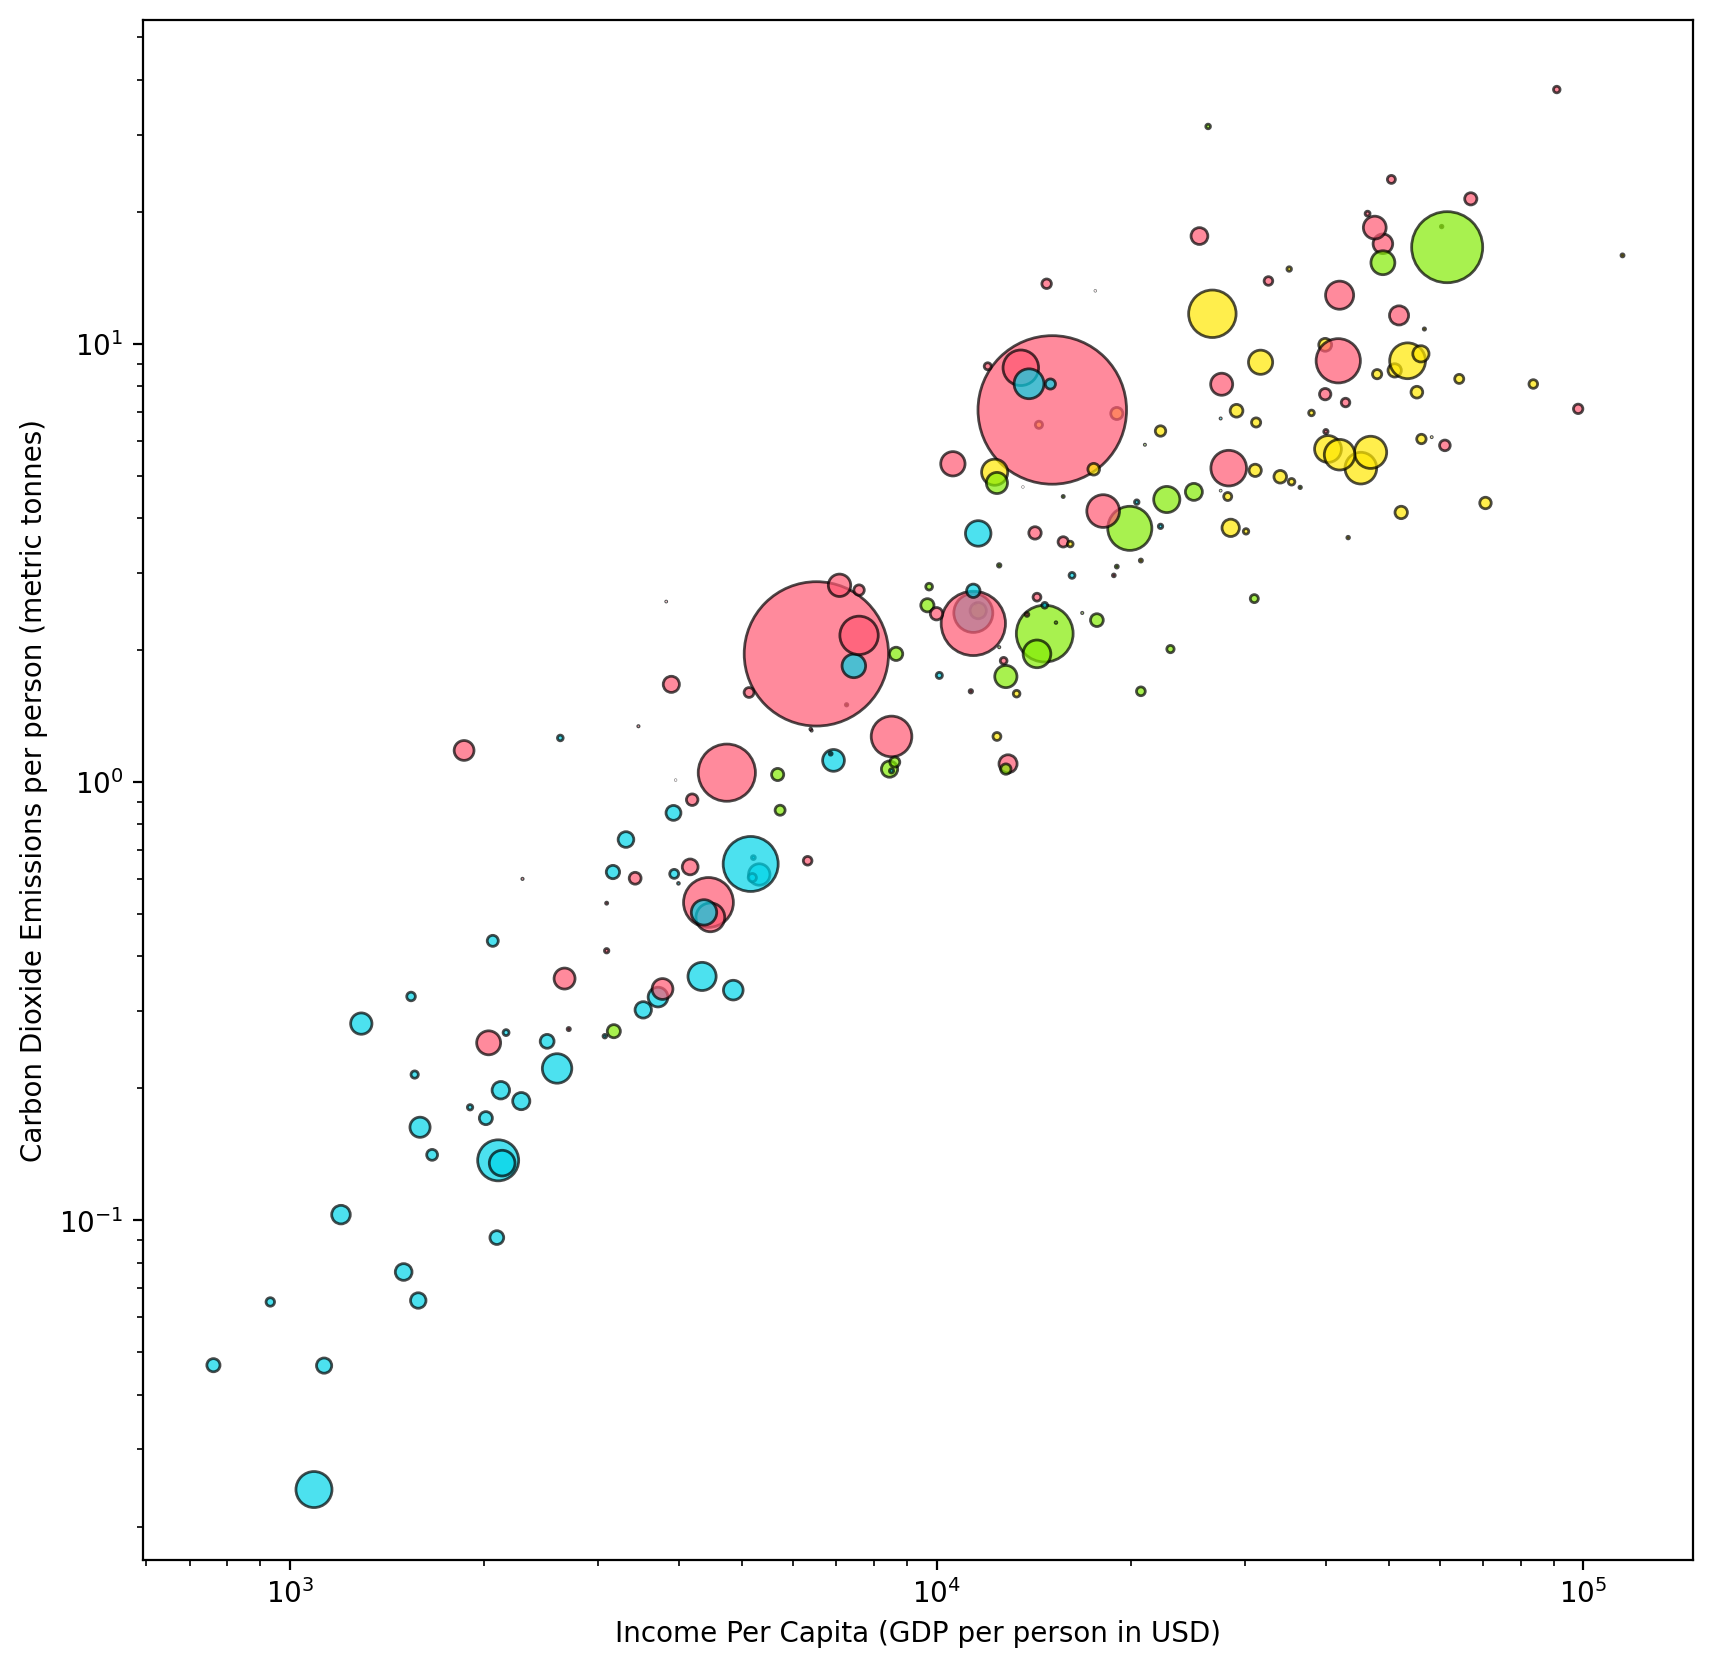

In [11]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(
    x=data.income,
    y=data.co2,
    s=data.population / 500000,
    alpha=0.7,
    color=color_list,
    edgecolors="black",
)
ax.set(
    xlabel="Income Per Capita (GDP per person in USD)",
    ylabel="Carbon Dioxide Emissions per person (metric tonnes)",
    xscale="log",
    yscale="log",
)

Now this is quite close to what we want, but now that the plot is much bigger, the scale of the markers can be larger, so lets increase their size by changing how the `s` value is set, dividing it by 100,000 instead of 500,000. Let's also add in grid lines to make this plot easier to read - this can be done with the `ax.grid()` method, which adds the gridlines to the plot.

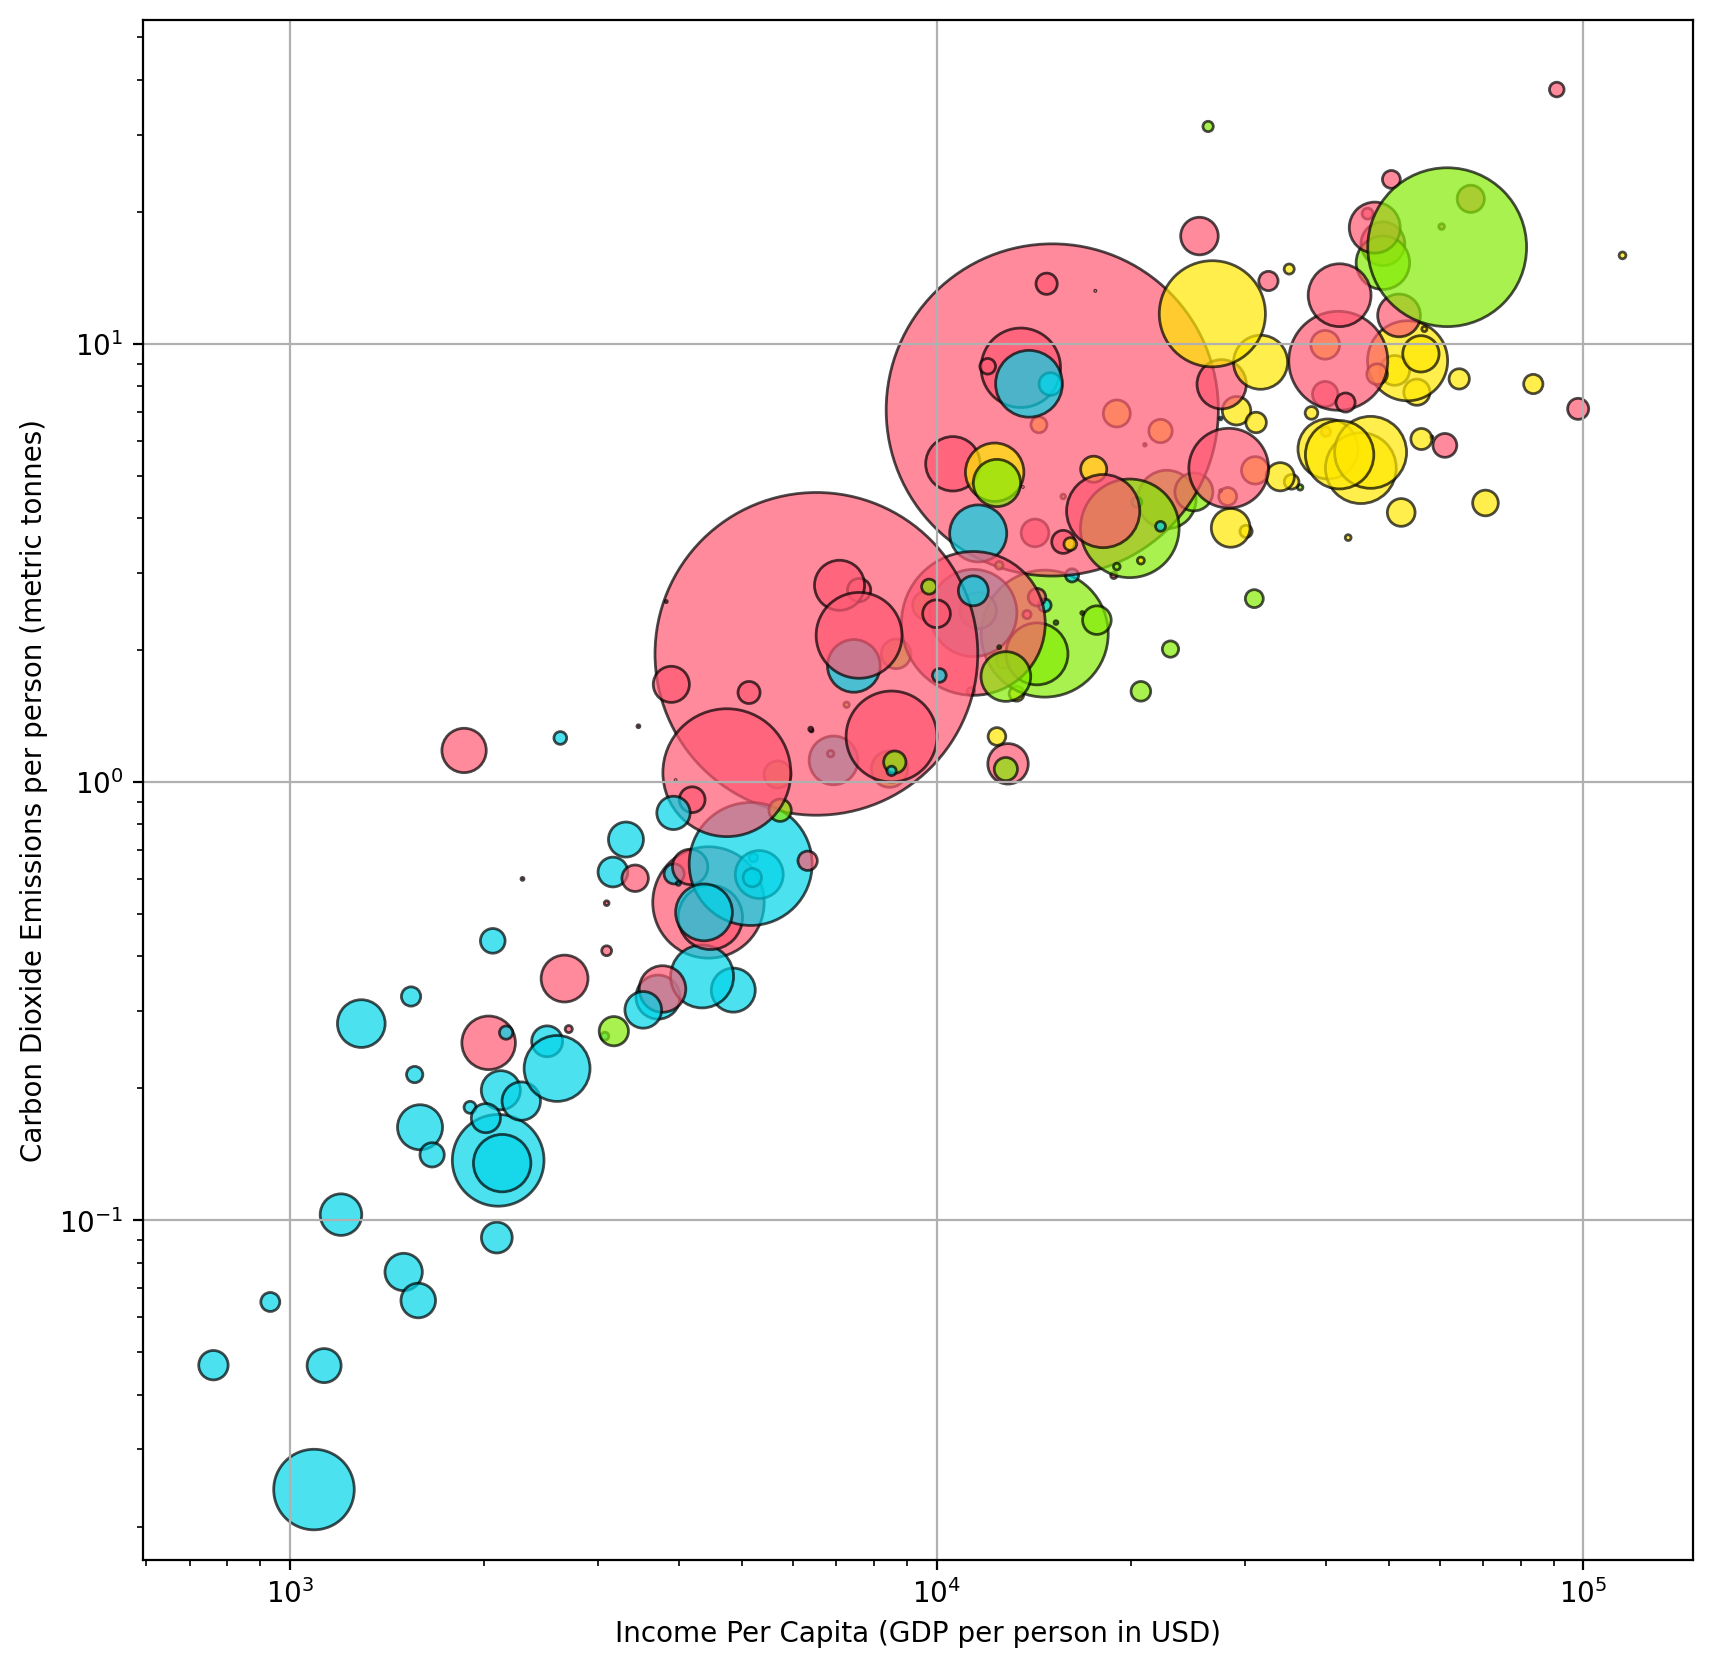

In [12]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(
    x=data.income,
    y=data.co2,
    s=data.population / 100000,
    alpha=0.7,
    color=color_list,
    edgecolors="black",
)
ax.set(
    xlabel="Income Per Capita (GDP per person in USD)",
    ylabel="Carbon Dioxide Emissions per person (metric tonnes)",
    xscale="log",
    yscale="log",
)
ax.grid()

But we're still no quite there yet - the gridlines are only for the powers of 10: 100, 1,000, and 10,000 on the x-axis, for example. We can fix this by telling the grid method to not only use the major gridlines, but also the minor gridlines using hte `which='both'` property

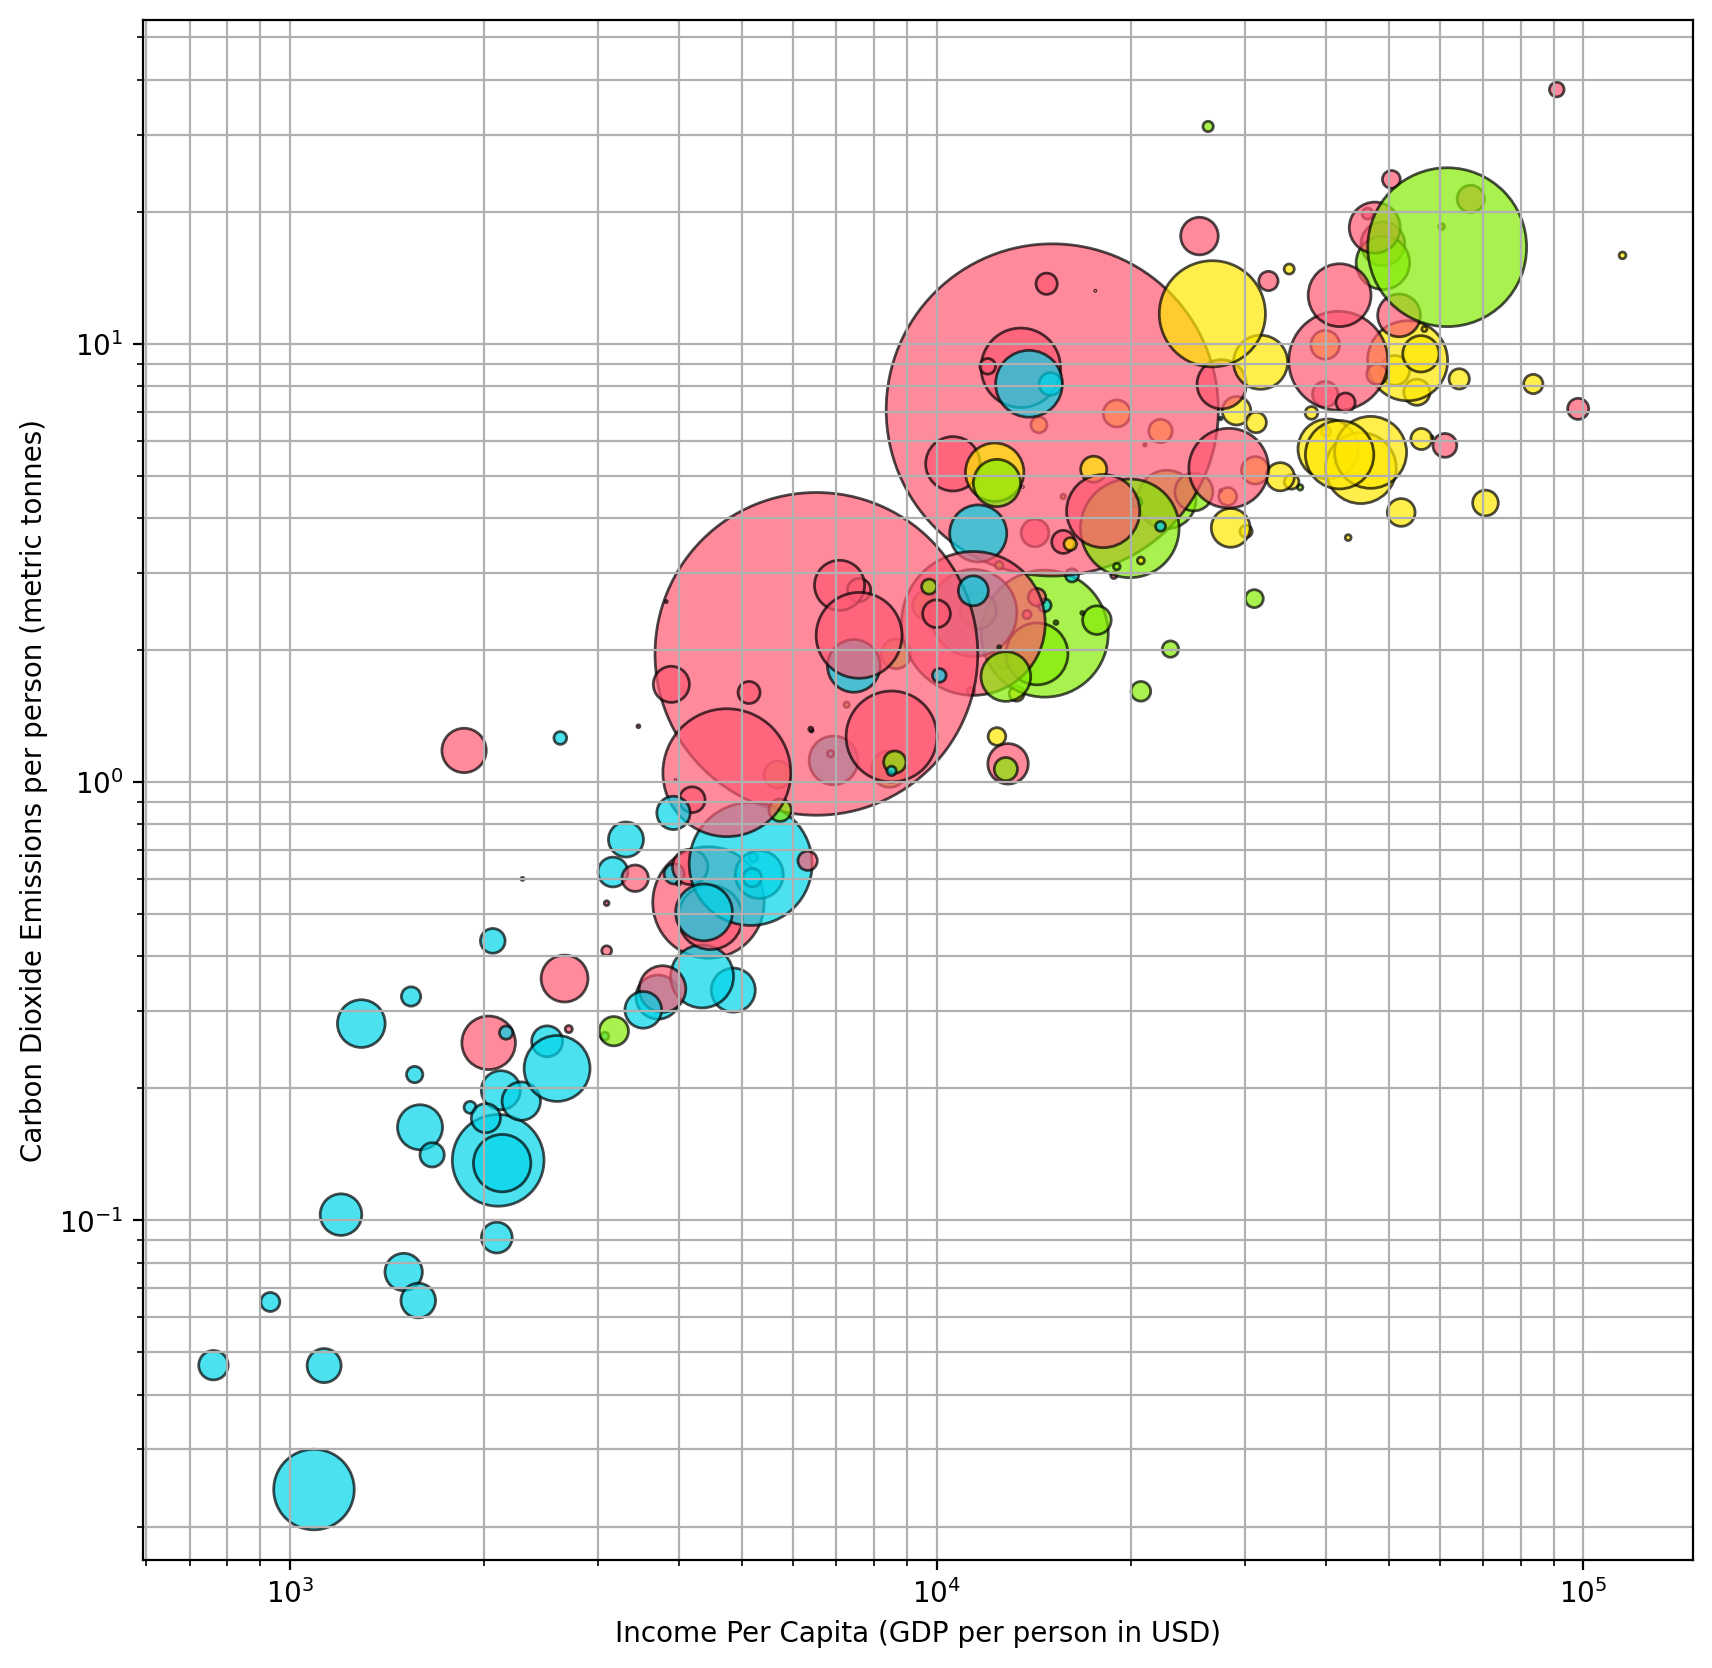

In [13]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(
    x=data.income,
    y=data.co2,
    s=data.population / 100000,
    alpha=0.7,
    color=color_list,
    edgecolors="black",
)
ax.set(
    xlabel="Income Per Capita (GDP per person in USD)",
    ylabel="Carbon Dioxide Emissions per person (metric tonnes)",
    xscale="log",
    yscale="log",
)
ax.grid(True, which="both")

The grid lines are plotted in FRONT of our markers, though - this makes it harder to read. Let's move those back with `ax.set_axisbelow(True)`, which plots the axes and gridlines behind the markers

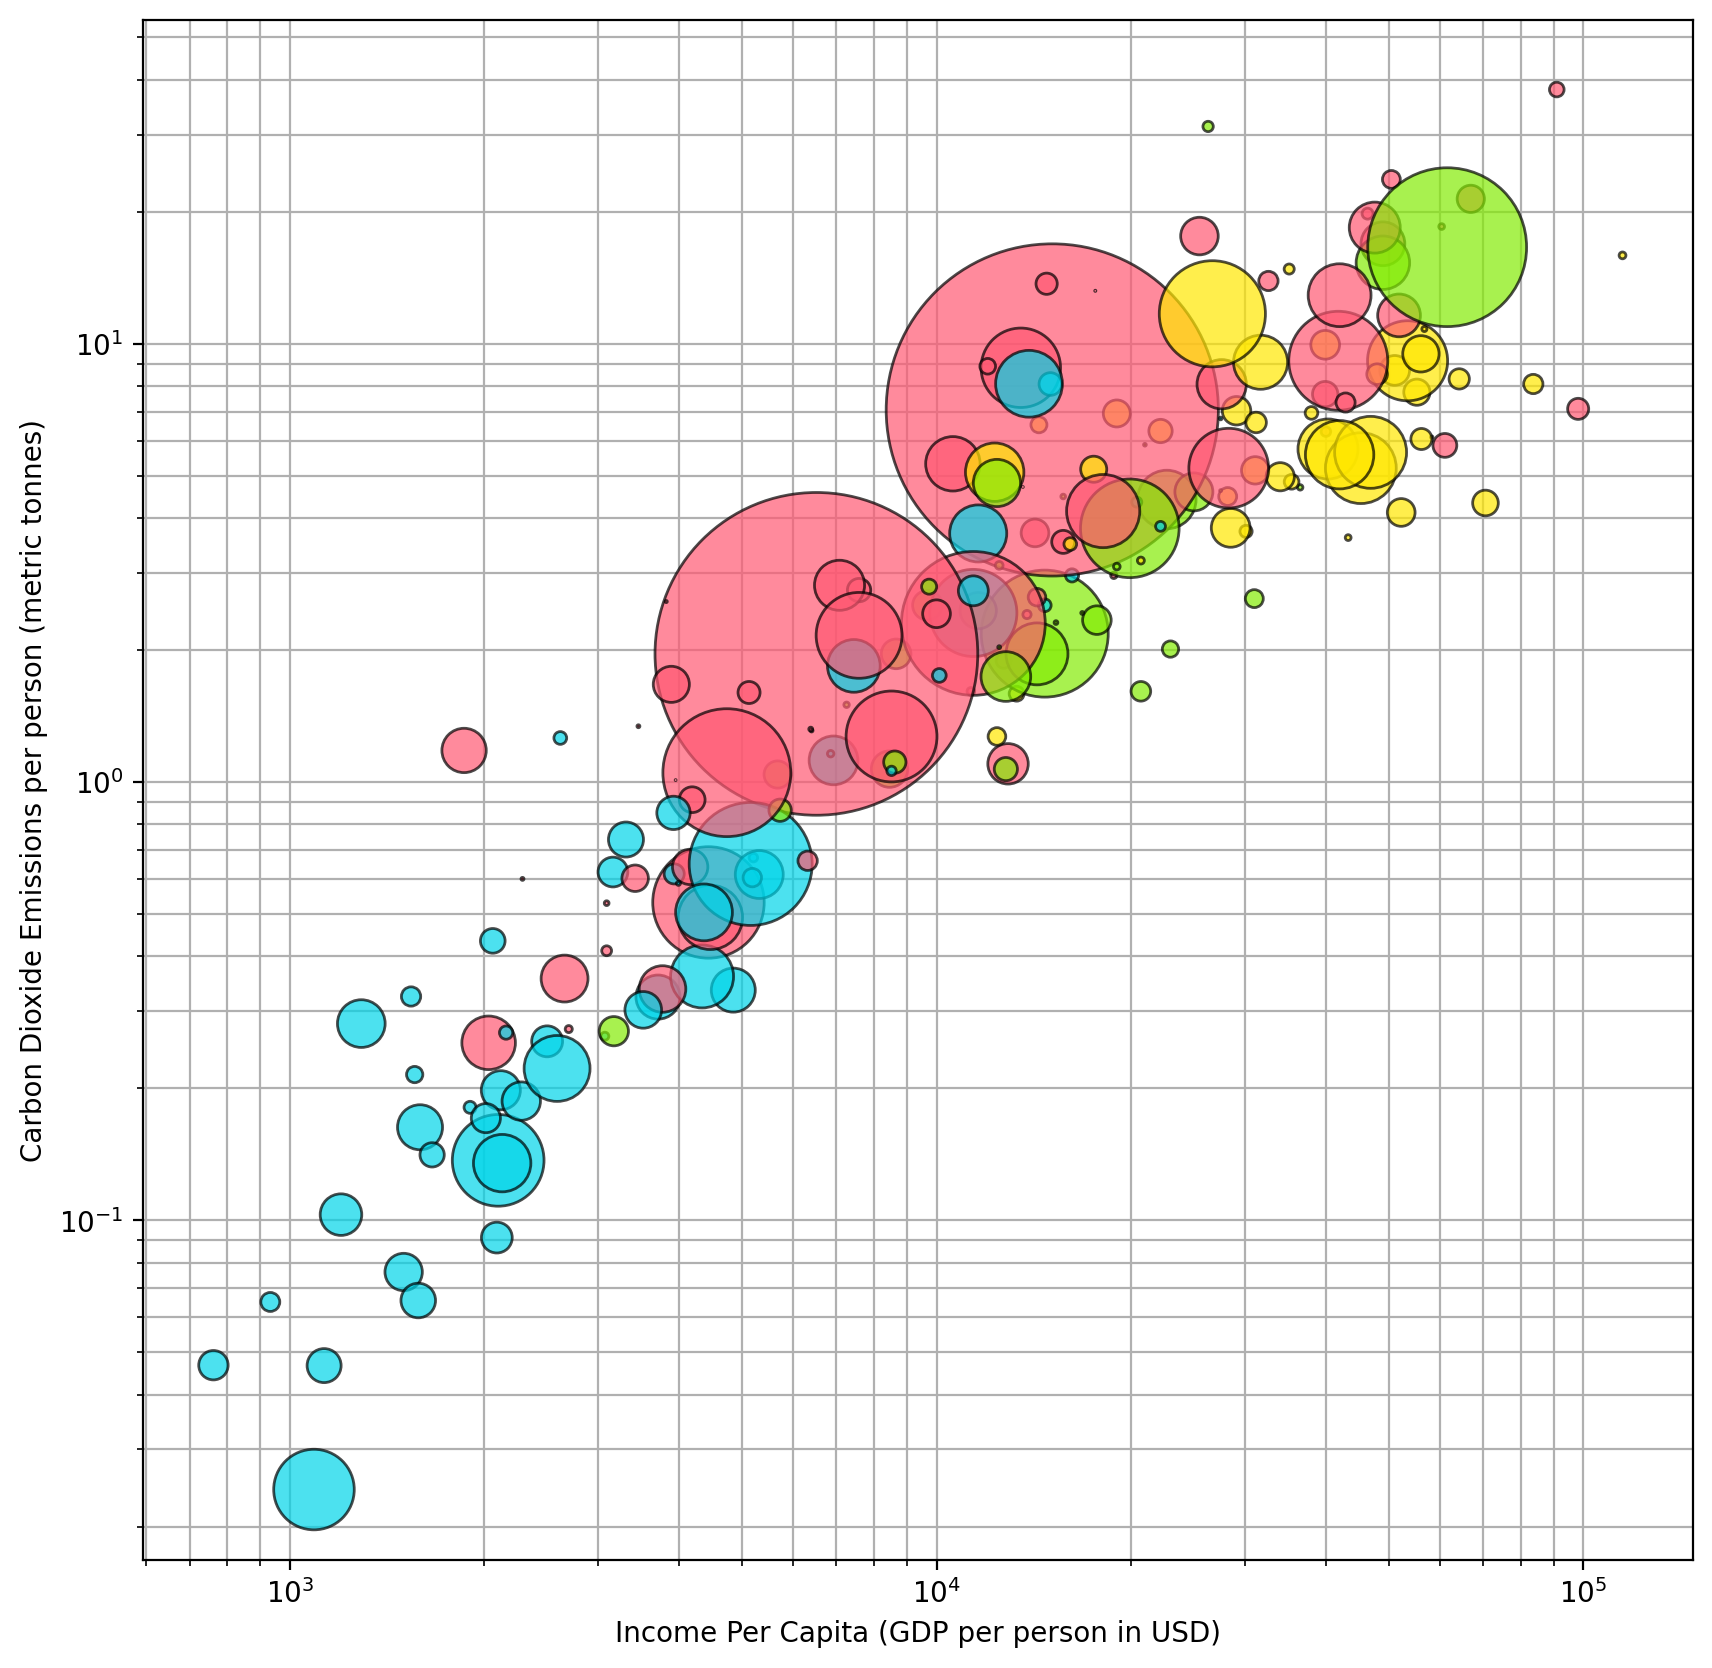

In [14]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(
    x=data.income,
    y=data.co2,
    s=data.population / 100000,
    alpha=0.7,
    color=color_list,
    edgecolors="black",
)
ax.set(
    xlabel="Income Per Capita (GDP per person in USD)",
    ylabel="Carbon Dioxide Emissions per person (metric tonnes)",
    xscale="log",
    yscale="log",
)
ax.grid(which="both")
ax.set_axisbelow(True)

This is looking great, but we want this plot to be readily understood by a wide audience, so we really want all markings on the plot to be crystal clear to read. That leads to two more tweaks. First is that we need a legend for this plot, but using `ax.legend()` doesn't produce anything since we only used one set of scatterplot markers. Typically if we called the `scatter()` method on multiple datasets and plotted them each on the same set of axes, the `legend()` method would produce a nice legend entry for each time we called the `scatter()` method. In this case, since we only called `scatter()` once, we can't use this standard approach to create our legend. Fortunately, though, `matplotlib` is quite a versatile tool that allows you to create a custom legend.

To accomplish this we can create a custom legend by feeding in markers that are appropriate colored for each class, as shown in the example below:

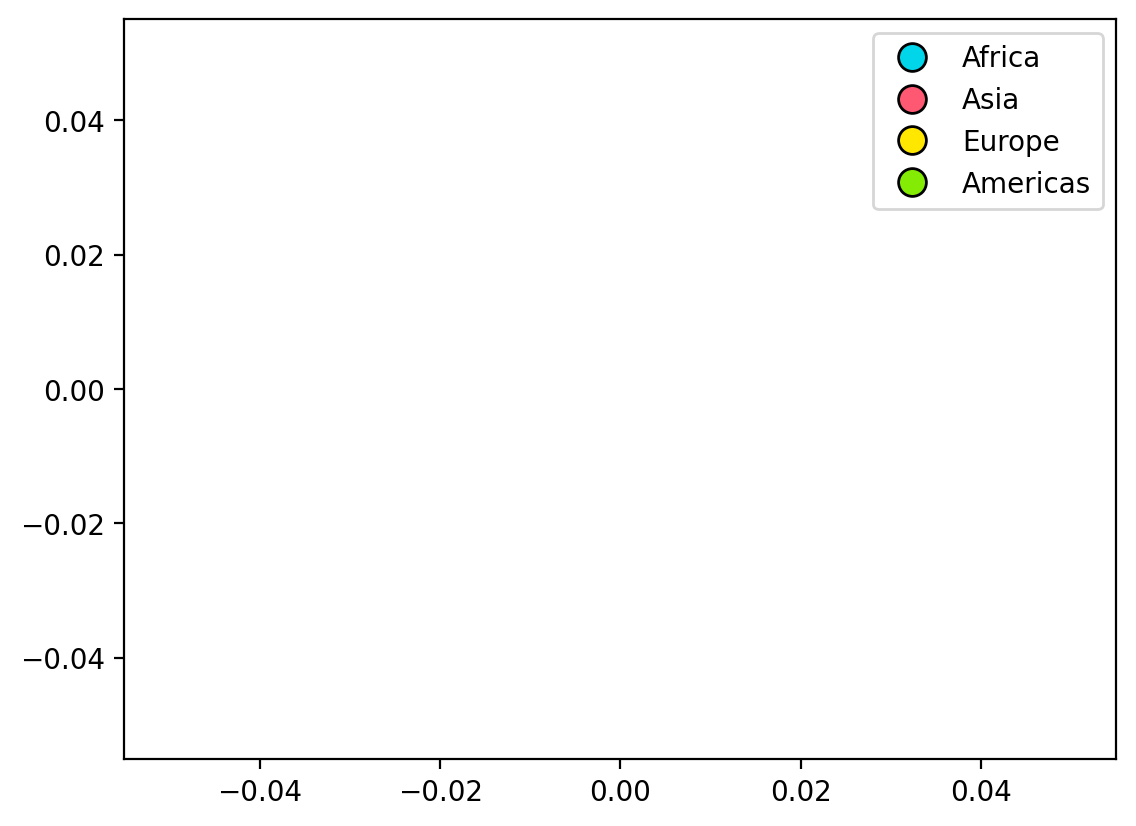

In [16]:
region = ["Africa", "Asia", "Europe", "Americas"]
color = ["#00d5e9", "#ff5872", "#ffe700", "#84ec04"]
fig, ax = plt.subplots()
legend_elements = []
for r, c in zip(region, color):
    legend_elements.append(
        ax.plot(
            [],
            [], # Coordinates of the item to plot (we leave this blank so it doesn't actually plot anything)
            linewidth=0,  # removes the line
            marker="o",  # Sets our plot to be a circle
            color="black",  # Sets the edge color of the marker
            label=r,  # The label we want for this legend entry
            markerfacecolor=c,  # The color of the inside of the marker
            markersize=10,  # Pick a size the looks readable on the plot
        )[0] # Since the plot method returns a list of Line2D objects, we select the first (and in this case only) entry
    )

# Create a sample figure to demonstrate the output of the legend() method

ax.legend(handles=legend_elements)

Now let's bring this altogether using the legend elements we created above:

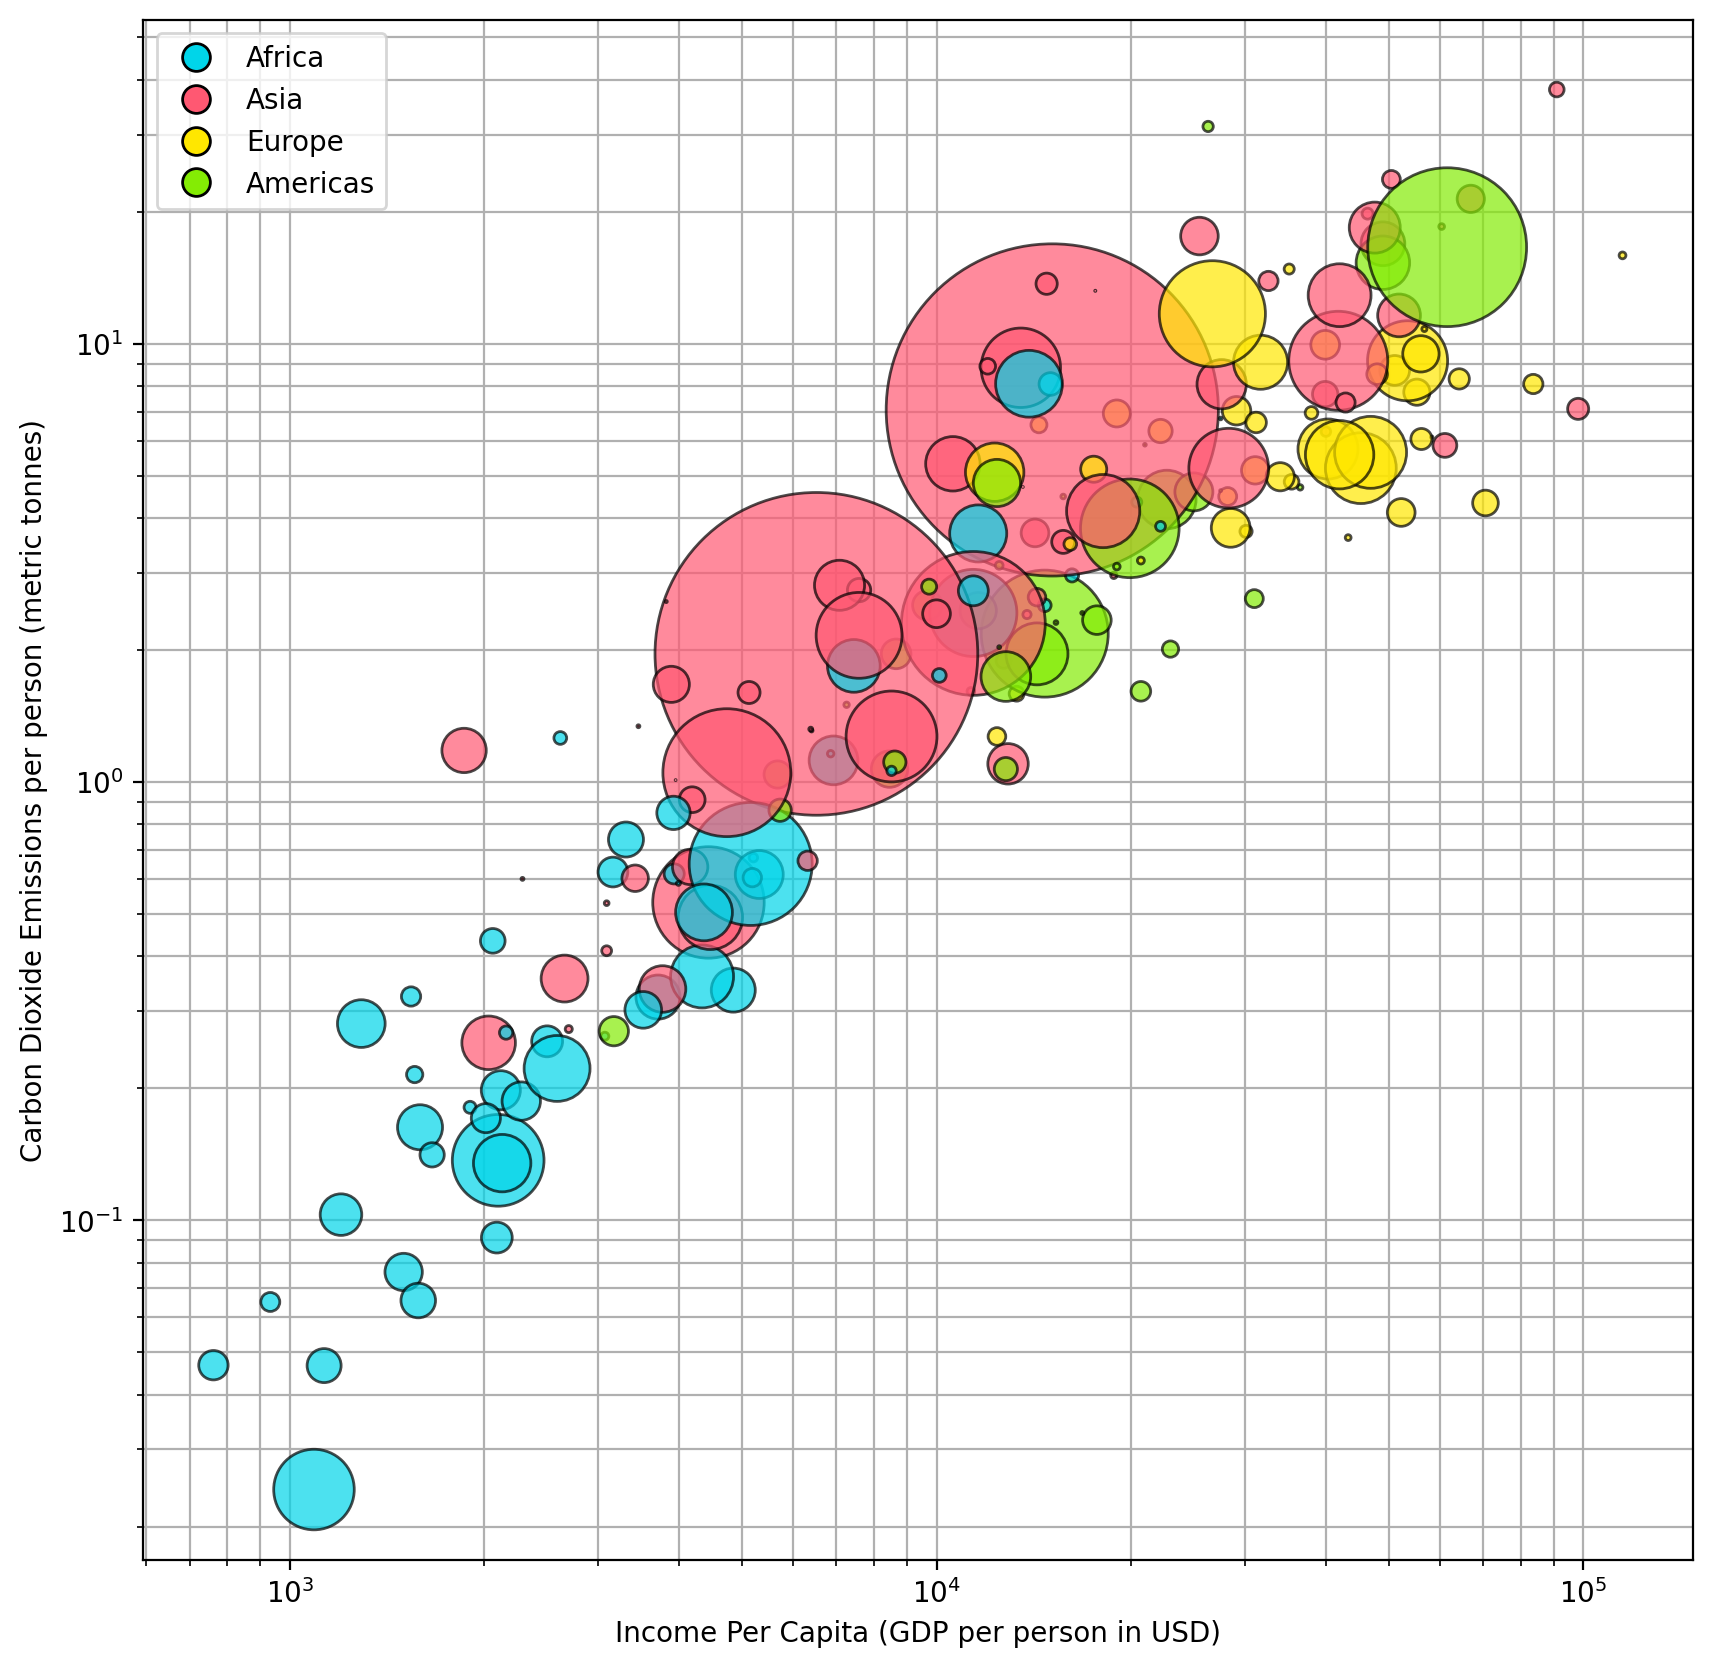

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
z = ax.scatter(
    x=data.income,
    y=data.co2,
    s=data.population / 100000,
    alpha=0.7,
    color=color_list,
    edgecolors="black",
)
ax.set(
    xlabel="Income Per Capita (GDP per person in USD)",
    ylabel="Carbon Dioxide Emissions per person (metric tonnes)",
    xscale="log",
    yscale="log",
)
ax.grid(which="both")
ax.set_axisbelow(True)
ax.legend(handles=legend_elements)

fig.savefig('img/finished-product.png', dpi=300, bbox_inches='tight')

And there we go - a beautiful, publication-quality plot that shows the clear relationship between per capita income and per capita carbon dioxide emissions.

## You take it the final step

There's more you could add here and I encourage you to consider exploring ways to improve this. For example, this figure could benefit from a second legend that encodes the circle size, as of now, that information is missing - try adding it in! Second, none of the countries are labeled - add in some labels for notable countries with extreme values to point them out to the reader. Also, try applying alternative styles to the plot to enhance it's professionalism.